In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ode
import scipy.integrate
%matplotlib notebook

# PHY 2200 ODE Project, Isabelle Parker

This notebook is intended to model the differences in the predictions for classical and relativistic motions of a particle starting from rest and accelerating up to (and beyond in the classical case) the speed of light. This problem will be modelled with a $1kg$ mass, given $2000N$ of force every second.

<br/>

The ODE that determines an object's classical acceleration is as follows:

$$ \frac{dv_x}{dt} = \frac{F_{net,x}}{m} $$

The ODE that determines an object's relativistic acceleration is as follows:

$$ \frac{dp_x}{dt} = F_{net,x} $$

where $p_x = \gamma mv_x $, and $\gamma = \frac{1}{\sqrt{1-\frac{v^2}{c^2}}}$ 

### Classical Acceleration
The function below determines $\frac{dx}{dt}$ and $\frac{dv}{dt}$ for an object when assuming non-relativistic behaviors.
<br/>
With this, we are able to pass these derivatives into our favorite ODE solver, being RK4 in this case.

In [3]:
def accel_class(dep, t):
    
    x = dep[0]
    v = dep[1]
    
    deriv = np.zeros(2)
    deriv[0] = v
    deriv[1] = acc
    
    return deriv

We will now give this $1kg$ object plenty of time to accelerate up to and blow right past $3\cdot10^{8} \frac{m}{s}$.
<br/>
From here, RK4 will do the work of integrating the derivatives given from the *accel_class* function, and show us how the velocity changes over time.

In [4]:
###Classical

#Constants used in both###
acc = 2000
m = 1
v0 = 0
x0 = 0

c = 3e8
##########################

data_c = np.array([x0, v0])
h = 1
t = 0

Nsteps = int(400000/h)


xarr_c = np.zeros(Nsteps)
varr_c = np.zeros(Nsteps)
tarr = np.zeros(Nsteps)

tarr[0] = 0
xarr_c[0] = x0
varr_c[0] = v0

for n in range(0, Nsteps-1):
    
    data_c = ode.RK4(accel_class, data_c, t, h)
    t = t + h
    
    tarr[n+1] = t
    xarr_c[n+1] = data_c[0]
    varr_c[n+1] = data_c[1]


Now we see something that is honestly not very surprising: Velocity continues to go up linearly as a constant acceleration is applied to it when relativistic effects are ignored.

<IPython.core.display.Javascript object>


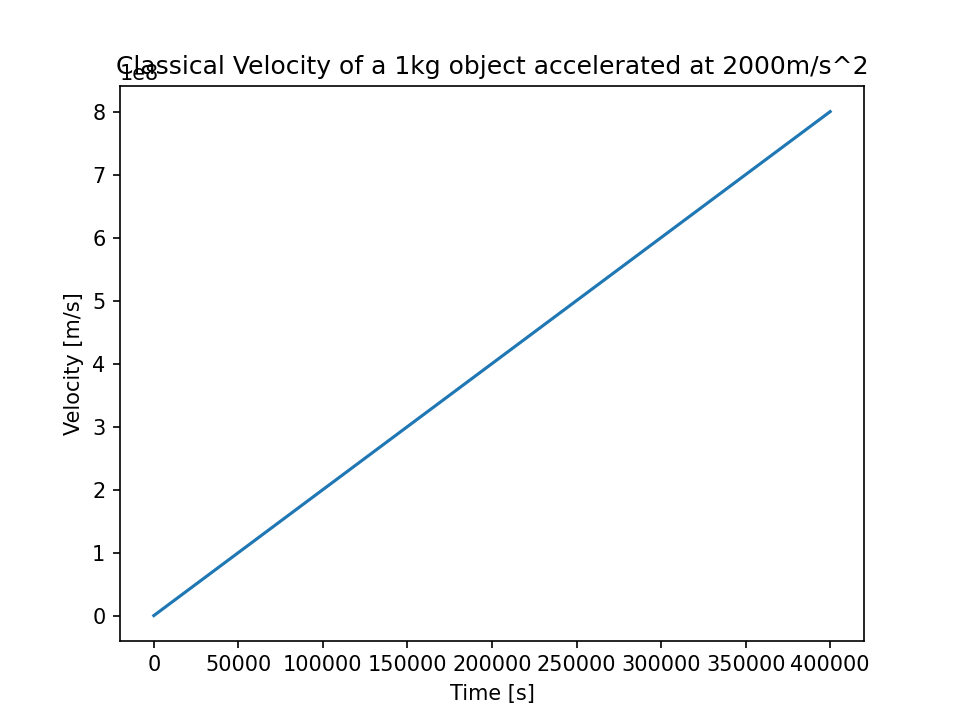

In [5]:
plt.figure()
plt.title("Classical Velocity of a 1kg object accelerated at " + str(acc) + "m/s^2")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")
plt.plot(tarr, varr_c)

### Relativistic Acceleration
We will now look at the same scenario as before, but this time take into account effects predicted by Einstein's Theory of Special Relativity.
<br/>
As before, we are trying to find the velocity of an object as it is given a constant acceleration, but the way that this is calculated is drastically different.


In [6]:
def accel_relativ(dep, t):

    x = dep[0]
    p = dep[1]
    
    
    deriv = np.zeros(2)
    deriv[0] = p/np.sqrt((m**2 + (p/c)**2)) 
    deriv[1] = m*acc
    
    return deriv

In [7]:
###Relativistic

data_r = np.array([x0, v0*m])

t = 0
h = 1
Nsteps = int(400000/h)


xarr_r = np.zeros(Nsteps)
varr_r = np.zeros(Nsteps)
tarr = np.zeros(Nsteps)

tarr[0] = 0
xarr_r[0] = x0
varr_r[0] = v0

for n in range(0, Nsteps-1):
    
    data_r = ode.RK4(accel_relativ, data_r, t, h)
    t = t + h
    
    p = data_r[1]
    
    v = p/np.sqrt(m**2 + (p/c)**2)
    
    tarr[n+1] = t
    xarr_r[n+1] = data_r[0]
    varr_r[n+1] = v


As we graph velocity over time, this time *considering* relativistic effects, we see a much different result than when we didn't consider those effects.
<br/>
We now see that the change in velocity over time tapers off and seems to reach $c$ asymptotically.

<IPython.core.display.Javascript object>


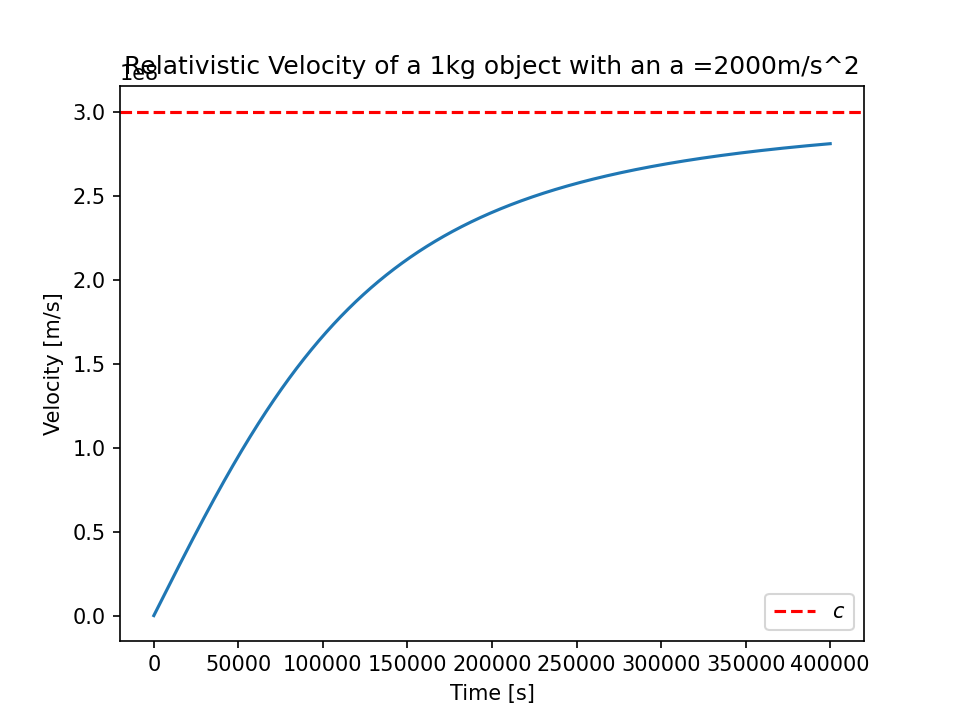

In [8]:
plt.figure()
plt.title("Relativistic Velocity of a 1kg object with an a =" + str(acc) + "m/s^2")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")
plt.axhline(3e8, color = 'red', linestyle = '--', label = "$c$")
plt.plot(tarr, varr_r)
plt.legend()

Below is both classical and relativistic velocities for our $1kg$ object over time.

<IPython.core.display.Javascript object>


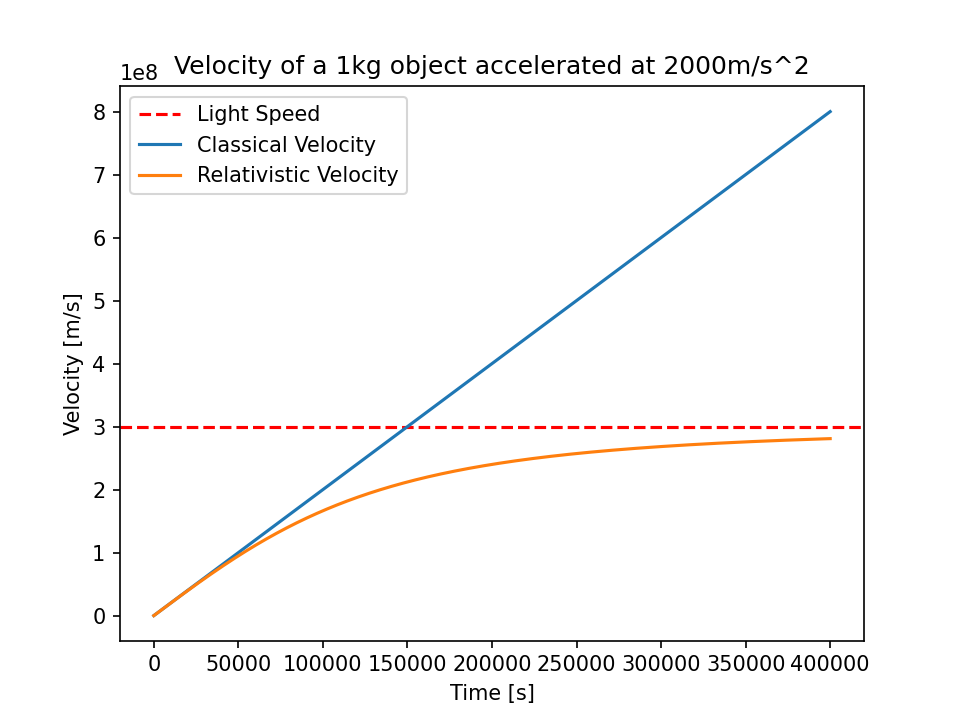

In [9]:
plt.figure()
plt.title("Velocity of a 1kg object accelerated at "+ str(acc) + "m/s^2")
plt.axhline(3e8, color = 'red', linestyle = '--', label = "Light Speed")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")
plt.plot(tarr, varr_c, label = "Classical Velocity")
plt.plot(tarr, varr_r, label = "Relativistic Velocity")
plt.legend()

### Divergence
Now that we ***see*** the differences in classical and relativistic velocities, let's try to figure out where they diverge in fractions of $c$. 

In [12]:
vdiv = (varr_c - varr_r)

found = np.where(np.logical_and(vdiv < 50000, vdiv > 100))

vr_div = varr_r[found]
vc_div = varr_c[found]
t_div = tarr[found]

This divergence in velocity is visible when you zoom into the graph, but effects start to noticeably kick in on the magnitude of $0.01c$.
<br/>
This difference, of course, is much more noticable once you reach significant fractions of $c$.

<IPython.core.display.Javascript object>


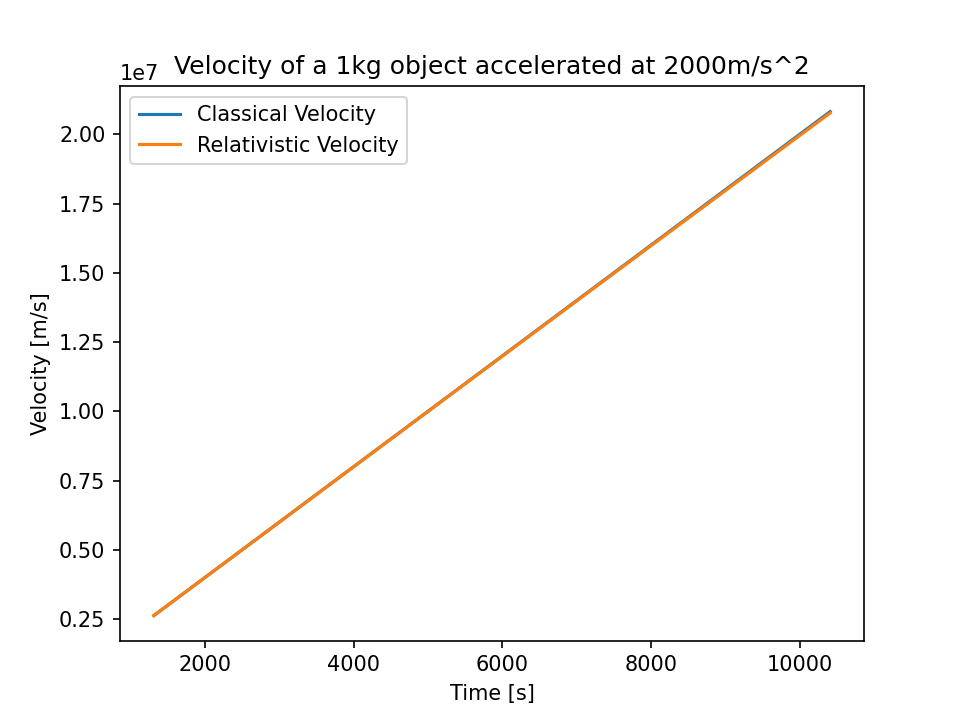

In [14]:
plt.figure()
plt.title("Velocity of a 1kg object accelerated at "+ str(acc) + "m/s^2")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")
plt.plot(t_div, vc_div, label = "Classical Velocity")
plt.plot(t_div, vr_div, label = "Relativistic Velocity")
plt.legend()